# Distance Traveled Visualization Book

In [166]:
# Dependencies
import pandas as pd
import numpy as np
import os
import sys


path_to_school_info = os.path.join('..', 'data', 'arena_school_info.csv')  
school_info = pd.read_csv(path_to_school_info) # Load the school data including logo path into a dataframe

path_to_team_table = os.path.join('..', 'data', 'output', 'team_travel_summary_final_v1.csv')
team_df = pd.read_csv(path_to_team_table)

path_to_conf_table = os.path.join(os.getcwd(), '..', 'data', 'output', 'conference_travel_stats_v1.csv')
conf_df = pd.read_csv(path_to_conf_table)

##################### CONSTANT PATHS
logo_folder = os.path.join(os.getcwd(), '..', 'images', 'logos', 'conference')
print(os.listdir(logo_folder)) # print directory
## TEMP DIR - IMAGES SUB FOLDER
temp_folder = os.path.join('..', 'TEMP', 'IMAGES')
# print(os.listdir(temp_folder)) # print
img_folder = os.path.join('..', 'TEMP', 'IMAGES')


# team_df.head()
# conf_df.head(6)

['atlantic.png', 'big_ten.png', 'ccha.png', 'ecac.png', 'ecac_large.png', 'ecac_scaled.png', 'hockey_east.png', 'hockey_east_2.png', 'independent.png', 'independent_2.png', 'independent_scaled.png', 'ncaa_1.png', 'ncaa_2.png', 'nchc.png', 'nchc_2.png']


## Conference Comparison Plot

In [167]:
# ### Plot the average non conference and trip within the conference for each conference
# import matplotlib.pyplot as plt

# # Plot the average non conference and trip within the conference for each conference
# # Create side by side bars for each conference
# plt.figure(figsize=(10,8))
# barWidth = 0.25
# r1 = np.arange(len(conf_df['Conference']))
# r2 = [x + barWidth for x in r1]

# plt.bar(r1, conf_df['non_con_AVG'], color='b', width=barWidth, edgecolor='grey', label='Average Non-Conference Road Trip')
# plt.bar(r2, conf_df['con_AVG'], color='r', width=barWidth, edgecolor='grey', label='Average Conference Road Trip')

# # place the numberical values on the bars
# for i in range(len(r1)):
#     plt.text(x=r1[i]-0.1, y=conf_df['non_con_AVG'][i]+0.5, s=round(conf_df['non_con_AVG'][i], 2), size=10)
#     plt.text(x=r2[i]-0.1, y=conf_df['con_AVG'][i]+0.5, s=round(conf_df['con_AVG'][i], 2), size=10)

# # add a second axis to plot the average number of trips per conference
# # plt.twinx()
# # plt.plot(r1, conf_df['non_con_trips_AVG'], color='g', marker='o', label='Average Number of Trips')

# # Labels and Title
# plt.xlabel('Conference', fontweight='bold')
# # plt.xticks([r + barWidth for r in range(len(conf_df['Conference']))], conf_df['Conference'])
# # plt.ylabel('Average Distance (Miles)', fontweight='bold')

# # Add Grid Lines behind bars
# plt.grid(axis='y', linestyle='--', alpha=0.5)
# # Minor ticks
# plt.minorticks_on()


# plt.title('Average Road Trip Distance by Conference', fontweight='bold')
# plt.legend()
# plt.show()



In [168]:
conf_df.head(6)

# fill any nan values with 0
conf_df.fillna(0, inplace=True)

conf_df.head(6)

,Conference,AVG_Total_Trips,N_trips_AVG,N_total_distance_AVG,N_AVG,N_shortest_AVG,N_longest_AVG,non_con_trips_AVG,non_con_total_distance_AVG,non_con_AVG,non_con_shortest_AVG,non_con_longest_AVG,con_trips_AVG,con_total_distance_AVG,con_AVG,con_shortest_AVG,con_longest_AVG
0,atlantic,11.18,0.36,465.46,1280.03,465.46,465.46,3.00,792.11,264.04,127.38,502.69,7.82,3071.72,392.89,162.28,1244.12
1,big_ten,10.29,2.00,952.02,476.01,95.84,884.62,2.14,1379.59,643.81,327.15,1021.88,6.14,2032.64,330.89,153.12,616.01
2,ccha,10.00,0.78,293.35,377.16,88.23,250.01,2.56,1449.15,567.06,169.91,915.10,6.67,2173.39,326.01,124.21,582.66
3,ecac,14.25,0.75,458.19,610.92,30.70,433.56,2.33,424.15,181.78,80.92,245.56,11.17,1769.76,158.49,38.22,253.96
4,hockey_east,13.73,1.45,1468.11,1009.32,574.98,1183.25,2.18,828.59,379.77,140.65,649.66,10.09,864.14,85.64,44.87,215.91
5,independents,12.40,0.20,544.40,2721.99,544.40,544.40,12.20,15564.55,1275.78,196.60,2380.20,0.00,0.00,0.00,0.00,0.00


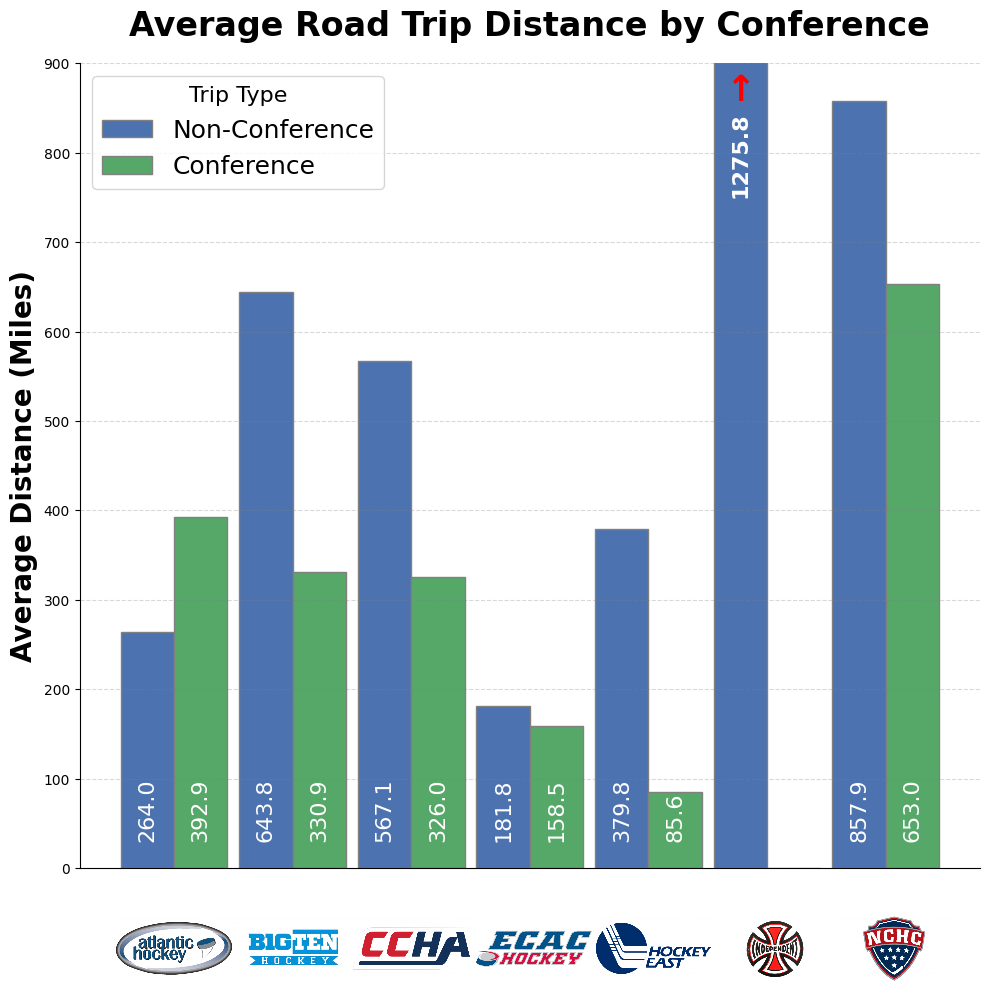

In [172]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


# def add_logos_to_plot(data_df, x_col, logo_mapping, logo_folder, ax, conferences):
#     for conference in conferences:
#         conference_data = data_df[data_df['Conference'] == conference]
#         if not conference_data.empty:
#             x = conference_data[x_col].values[0]
#             logo_filename = logo_mapping.get(conference)
#             if logo_filename:
#                 logo_path = os.path.join(logo_folder, logo_filename)
#                 if os.path.exists(logo_path):
#                     try:
#                         logo_img = Image.open(logo_path)
#                         # Reduce logo size
#                         imagebox = OffsetImage(logo_img, zoom=0.08)  # Reduced zoom to make logos smaller

#                         # Calculate small x offset for more spacing
#                         x_offset = 0.2 * (x - np.min(data_df['x_position'])) / np.ptp(data_df['x_position'])  
#                         ab = AnnotationBbox(
#                             imagebox,
#                             (x + x_offset, -0.1),  # Adjust x position with offset for spacing
#                             frameon=False,
#                             xycoords=('data', 'axes fraction'),
#                             boxcoords="offset points",
#                             pad=0
#                         )
#                         ax.add_artist(ab)
#                     except Exception as e:
#                         print(f"Error adding logo for {conference}: {e}")
#                 else:
#                     print(f"Logo file not found for {conference}: {logo_path}")
#             else:
#                 print(f"No logo mapping found for conference: {conference}")

###### OLD FUNCTION
def add_logos_to_plot(data_df, x_col, logo_mapping, logo_folder, ax, conferences):
    for conference in conferences:
        conference_data = data_df[data_df['Conference'] == conference]
        if not conference_data.empty:
            x = conference_data[x_col].values[0]
            logo_filename = logo_mapping.get(conference)
            if logo_filename:
                logo_path = os.path.join(logo_folder, logo_filename)
                if os.path.exists(logo_path):
                    try:
                        logo_img = Image.open(logo_path)
                        imagebox = OffsetImage(logo_img, zoom=0.175)  # Adjust zoom as needed
                        ab = AnnotationBbox(
                            imagebox,
                            (x, -0.1),  # Position logos just below the x-axis
                            frameon=False,
                            xycoords=('data', 'axes fraction'),  # Relative to axes, not data
                            boxcoords="offset points",
                            pad=0
                        )
                        ax.add_artist(ab)
                    except Exception as e:
                        print(f"Error adding logo for {conference}: {e}")
                else:
                    print(f"Logo file not found for {conference}: {logo_path}")
            else:
                print(f"No logo mapping found for conference: {conference}")


# Main plotting function
def plot_average_road_trip(conf_df, logo_mapping, logo_folder, img_folder=None, temp_folder=None):
    """
    Plots the average non-conference and conference road trip distances for each conference with enhanced styling,
    including conference logos.
    """
    
    # Ensure necessary columns exist
    required_columns = {'Conference', 'non_con_AVG', 'con_AVG'}
    if not required_columns.issubset(conf_df.columns):
        raise ValueError(f"DataFrame must contain columns: {required_columns}")

    # Define bar width and positions
    bar_width = 0.45
    indices = np.arange(len(conf_df['Conference']))
    
    # Add a temporary column for x positions
    conf_df['x_position'] = indices

    # Create a figure and axis with a square aspect ratio
    fig, ax = plt.subplots(figsize=(10, 10))  # 1:1 aspect ratio
    
    # Define color palette
    colors = ['#4C72B0', '#55A868']  # Custom colors
    
    # Plot bars
    bars1 = ax.bar(indices - bar_width/2, conf_df['non_con_AVG'], width=bar_width, color=colors[0], edgecolor='grey', label='Avg Non-Conference Road Trip')
    bars2 = ax.bar(indices + bar_width/2, conf_df['con_AVG'], width=bar_width, color=colors[1], edgecolor='grey', label='Avg Conference Road Trip')

    # # Add annotations inside the bars with rotated text
    # for bar in bars1 + bars2:
    #     height = bar.get_height()
    #     ax.text(
    #         bar.get_x() + bar.get_width() / 2,  # Center the text horizontally
            
    #         30, # set the text to start just above the x axis at a consistent height
            
    #         # height - (0.85 * height),  # Move the text inside the bar (5% of the height down)
    #         # f'{height:.1f}',  # Format the text to one decimal place
    #         f'{height:.1f}',  # Format the text to no decimal place
    #         ha='center', 
    #         va='bottom',  # Vertically center the text inside the bar
    #         rotation=90,  # Rotate the text 90 degrees counter-clockwise
    #         fontsize=16,  # Slightly increase the font size
    #         # fontweight='bold',
    #         color='white'  # Change the text color to white for better contrast
    #     )
    ############# NEW OPTION ################
    # Set a static y-limit
    ax.set_ylim(0, 900)  # Set the y-limit based on your data range

    # Add annotations with arrows for bars that exceed the y-limit
    for bar in bars1 + bars2:
        height = bar.get_height()
        
        if height > 900:  # If the bar exceeds the y-limit
            # Add an arrow indicator
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                850,  # Place arrow at the y-limit
                '↑',  # Use an upward arrow as the marker
                ha='center', 
                va='bottom', 
                fontsize=26,  # Make the arrow large and visible
                fontweight='bold',
                color='red'  # Choose a color that stands out
            )
            
            # Add a numerical annotation just below the arrow
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                750,  # Place the value just below the y-limit
                f'{height:.1f}',  # Show the exact value of the bar
                ha='center', 
                va='bottom', 
                fontsize=16,
                rotation=90,  # Rotate the text for better visibility
                fontweight='bold',
                color='white'
            )
        else:
            # Normal annotations for bars within the limit
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                30,
                f'{height:.1f}', 
                ha='center', 
                va='bottom', 
                rotation=90, 
                fontsize=16,
                # fontweight='bold',
                color='white'
            )

    
    # Set title with enhanced styling
    ax.set_title('Average Road Trip Distance by Conference', fontsize=24, fontweight='bold', pad=20)
    
    # Set x and y labels with font styling
    ax.set_xlabel('Conference', fontsize=20, fontweight='bold')
    ax.set_ylabel('Average Distance (Miles)', fontsize=20, fontweight='bold')
    
    # Customize x-axis ticks
    ax.set_xticks([])
    # empty x labels
    ax.set_xticklabels([])

    # Apply a logarithmic scale to the y-axis
    # ax.set_yscale('log')

    # Remove x title
    ax.set_xlabel('')
    
    # Add grid lines
    ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.3)
    
    # Remove spines for a cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Customize legend with increased font size
    # ax.legend(title='', fontsize=18, loc='upper left')
    # Customize legend labels
    ax.legend(title='Trip Type', title_fontsize=16, fontsize=18, loc='upper left', labels=['Non-Conference', 'Conference'])
    
    ###### ORIGINAL Y LIMITS
    # Adjust y-limits to make space for logos below
    # ax.set_ylim(0, conf_df[['non_con_AVG', 'con_AVG']].values.max() + 50)  # Added space below for logos

    # Adjust y-limits so the bars for non independest conferences are not too close to the x-axis
    # Rescale y-axis to better fit the range of values, but might truncate tall bars
    # ax.set_ylim(0, 900)  # Adjust this value depending on your data range
#########################################################
    
    # Add conference logos below the x-ticks
    add_logos_to_plot(
        data_df=conf_df,
        x_col='x_position',
        logo_mapping=logo_mapping,
        logo_folder=logo_folder,
        ax=ax,
        conferences=conf_df['Conference'].tolist()
    )
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Save the plot if paths are provided
    if img_folder and temp_folder:
        os.makedirs(img_folder, exist_ok=True)
        os.makedirs(temp_folder, exist_ok=True)
        plt.savefig(os.path.join(temp_folder, 'average_road_trip.png'), dpi=300, bbox_inches='tight')
        plt.savefig(os.path.join(img_folder, 'average_road_trip.png'), dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()


# Example usage:

# # Define DataFrame with conference information
# conf_df = pd.DataFrame({
#     'Conference': ['Atlantic', 'Big Ten', 'CCHA', 'ECAC', 'Hockey East', 'NCHC', 'Independents'],
#     'non_con_AVG': [150.5, 200.3, 180.2, 160.4, 170.6, 190.1, 175.0],
#     'con_AVG': [100.2, 120.5, 110.3, 115.4, 130.7, 125.6, 105.8]
# })

# Define logo mapping: Conference name to logo filename
logo_mapping = {
    'atlantic': 'atlantic.png',
    'big_ten': 'big_ten.png',
    'ccha': 'ccha.png',
    'ecac': 'ecac_scaled.png',
    'hockey_east': 'hockey_east.png',
    'nchc': 'nchc.png',
    'independents': 'independent_scaled.png'
}




# Call the plotting function
plot_average_road_trip(conf_df, logo_mapping, logo_folder, img_folder, temp_folder)


In [170]:
conf_df.head()

,Conference,AVG_Total_Trips,N_trips_AVG,N_total_distance_AVG,N_AVG,N_shortest_AVG,N_longest_AVG,non_con_trips_AVG,non_con_total_distance_AVG,non_con_AVG,non_con_shortest_AVG,non_con_longest_AVG,con_trips_AVG,con_total_distance_AVG,con_AVG,con_shortest_AVG,con_longest_AVG,x_position
0,atlantic,11.18,0.36,465.46,1280.03,465.46,465.46,3.00,792.11,264.04,127.38,502.69,7.82,3071.72,392.89,162.28,1244.12,0
1,big_ten,10.29,2.00,952.02,476.01,95.84,884.62,2.14,1379.59,643.81,327.15,1021.88,6.14,2032.64,330.89,153.12,616.01,1
2,ccha,10.00,0.78,293.35,377.16,88.23,250.01,2.56,1449.15,567.06,169.91,915.10,6.67,2173.39,326.01,124.21,582.66,2
3,ecac,14.25,0.75,458.19,610.92,30.70,433.56,2.33,424.15,181.78,80.92,245.56,11.17,1769.76,158.49,38.22,253.96,3
4,hockey_east,13.73,1.45,1468.11,1009.32,574.98,1183.25,2.18,828.59,379.77,140.65,649.66,10.09,864.14,85.64,44.87,215.91,4


## Team Plots
- Top Ten most trave
- 10 least travel
